# 12.4. Simulating a partial differential equation — reaction-diffusion systems and Turing patterns

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation 
from PIL import Image
import os
import math
plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'
%matplotlib inline

In [2]:
a = 2.8e-4
b = 5e-3
tau = .1
k = -.005

In [3]:
size = 100  # size of the 2D grid
dx = 20 #. / size  # space step

In [4]:
T = .5  # total time
dt = .001  # time step
n = int(T / dt)  # number of iterations

sigma = 400 * np.eye(2)
mu = [50, 50]
scale = 100/0.03978873577297385

def vFunc(x, y):
    global size
    if y == size / 2:
        return [0, 0]
    else:
        return np.array([(-1 * (x-(size/2))) / (y-(size/2)), (-1 * (x-(size/2))) / (y-(size/2))])
    
    
def buildV(X, Y, scale):
    global size
    #sgn = lambda x: x/abs(x) if x != 0 else 0
    """
    if x < 0 and y > 0:
        return np.array([sgn(x) / 10, -sgn(y) / 10])
    elif x < 0 and y < 0:
        return np.array([-sgn(x) / 10, sgn(y) / 10])
    elif x > 0 and y > 0:
        return np.array([-sgn(x) / 10, sgn(y) / 10])
    elif x > 0 and y < 0:
        return np.array([sgn(x) / 10, -sgn(y) / 10])
        
    return np.array([0, 0])
    """
    #return (np.ones_like(X) * np.sqrt(.1) + np.sign(X) * .1, np.ones_like(Y) * np.sqrt(.1))
    
        def vx(t):
            
        def vy(t):
            
    return (vx, vy)
    #return (np.ones_like(X) * np.sqrt(scale), np.ones_like(Y) * np.sqrt(scale))
    #return (-1 *np.sign(X) * scale, Y*0)


def buildC(grid, scale):
    grid = np.array(grid)
    return (scale * np.exp(-.5 * grid).T @ (np.linalg.inv(sigma) @ (grid))) / (np.sqrt((2 * np.pi)**2 * np.linalg.det(sigma)))

[[0.4472136 0.4472136 0.4472136 ... 0.4472136 0.4472136 0.4472136]
 [0.4472136 0.4472136 0.4472136 ... 0.4472136 0.4472136 0.4472136]
 [0.4472136 0.4472136 0.4472136 ... 0.4472136 0.4472136 0.4472136]
 ...
 [0.4472136 0.4472136 0.4472136 ... 0.4472136 0.4472136 0.4472136]
 [0.4472136 0.4472136 0.4472136 ... 0.4472136 0.4472136 0.4472136]
 [0.4472136 0.4472136 0.4472136 ... 0.4472136 0.4472136 0.4472136]]
[[0.4472136 0.4472136 0.4472136 ... 0.4472136 0.4472136 0.4472136]
 [0.4472136 0.4472136 0.4472136 ... 0.4472136 0.4472136 0.4472136]
 [0.4472136 0.4472136 0.4472136 ... 0.4472136 0.4472136 0.4472136]
 ...
 [0.4472136 0.4472136 0.4472136 ... 0.4472136 0.4472136 0.4472136]
 [0.4472136 0.4472136 0.4472136 ... 0.4472136 0.4472136 0.4472136]
 [0.4472136 0.4472136 0.4472136 ... 0.4472136 0.4472136 0.4472136]]
(101, 101)


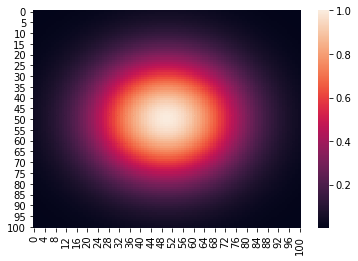

In [5]:
#v = np.array(np.array([[sinFunc(x, y) for x in range(int(-1*size/2), int(size/2))] for y in range(int(-1*size/2), int(size/2))]))
grid = np.meshgrid(np.arange(-50, 51, 1), np.arange(-50, 51, 1))
X, Y = grid
vx, vy = buildV(X, Y, .2)
print(vx)
print(vy)
c = np.array([[scale * np.exp(-.5 * (np.array([i,j]) - mu).T @ (np.linalg.inv(sigma) @ (np.array([i,j]) - mu ))) / (np.sqrt((2 * np.pi)**2 * np.linalg.det(sigma))) for j in range(size + 1)] for i in range(size + 1)])
print(c.shape)
#print(v)
#v[50, 50] = 0
#v = np.full((100, 100), 1)
#v.shape()
#print(v)
#i = np.full((100,100,2),.05)
#print(type(i))
#print(type(i[0]))
#print(type(i[0][0]))
#print(i)
#print(i.shape)
d = np.full((101,101),16)
#print(np.max(c))
import seaborn as sns
sns.heatmap(c)
#sns.heatmap(v[0])

In [6]:
def laplacian(Z):
    Ztop = Z[0:-2, 1:-1]
    Zleft = Z[1:-1, 0:-2]
    Zbottom = Z[2:, 1:-1]
    Zright = Z[1:-1, 2:]
    Zcenter = Z[1:-1, 1:-1]
    return (Ztop + Zleft + Zbottom + Zright -
            4 * Zcenter) / dx**2
def grad(Z):
    Ztop = Z[0:-2, 1:-1]
    Zleft = Z[1:-1, 0:-2]
    Zbottom = Z[2:, 1:-1]
    Zright = Z[1:-1, 2:]
    Zcenter = Z[1:-1, 1:-1]
    Zg = np.array([[[(Zright[i][j] - Zleft[i][j])/(2*dx), (Ztop[i][j] - Zbottom[i][j]) / (2*dx)] for j in range(len(Ztop))] for i in range(len(Ztop))])
    Zg = np.pad(Zg, ((1,1),(1,1),(0,0)), 'constant')
    
    return Zg    

def firstTerm(D, c):
    gD = grad(D)
    gc = grad(c)
    ggcx = grad(gc[:, :, 0])
    ggcy = grad(gc[:, :, 1])
    
    Dx = gD[:, :, 0]
    Dy = gD[:, :, 1]
    cx = gc[:, :, 0]
    cy = gc[:, :, 1]
    cxx = ggcx[:, :, 0]
    cyy = ggcy[:, :, 1]
    
    return Dx*cx + D*cxx + Dy*cy + D*cyy

""""def secondTerm(v, c):
    
    gc = grad(c)
    
    xv = v[:, :, 0]
    yv = v[:, :, 1]
    
    gv = grad(xv)
    
    cx = gc[:, :, 0]
    cy = gc[:, :, 1]
    xvx = grad(xv)[:, :, 0]
    yvy = grad(yv)[:, :, 1]
    
    return cx*xv + c*xvx + cy*yv + c*yvy"""


def secondTerm(vx, vy, c):
    
    gc = grad(c)
    
    xv = vx
    yv = vy
    
    gv = grad(xv)
    
    cx = gc[:, :, 0]
    cy = gc[:, :, 1]
    xvx = grad(xv)[:, :, 0]
    yvy = grad(yv)[:, :, 1]
    
    return cx*xv + c*xvx + cy*yv + c*yvy

In [7]:
#fig, axes = plt.subplots(6, 3, figsize=(8, 8))

step_plot = round(n / (24*T)) #n // (2*int(T))

fig = plt.figure()
ims = []
frames = []
# We simulate the PDE with the finite difference
# method.
for i in range(n):
    # We compute the Laplacian of u and v.
    if not i%step_plot:
        print(i)
    #div(D*grad(c)) - div(v*c) + R
    
    deltaC = firstTerm(d,c) - secondTerm(vx, vy,c)
    
    c[1:-1,1:-1] = c[1:-1,1:-1] + d[1:-1,1:-1] * deltaC[1:-1,1:-1]
    
    #deltaU = laplacian(U)
    #deltaV = laplacian(V)
    # We take the values of u and v inside the grid.
    #Uc = U[1:-1, 1:-1]
    #Vc = V[1:-1, 1:-1]
    # We update the variables.
    
    #c[1:-1, 1:-1] = -2 * c_row + deltaC * 
    
    
    #U[1:-1, 1:-1], V[1:-1, 1:-1] = \
     #   Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k),\
      #  Vc + dt * (b * deltaV + Uc - Vc) / tau
    # Neumann conditions: derivatives at the edges
    # are null.
    c[0] = c[1]
    c[-1] = c[-2]
    for Z in (c[1:-1, :]):
        Z[0] = Z[1]
        Z[-1] = Z[-2]


    # We plot the state of the system at
    # 9 different times.
    if i % step_plot == 0:# and i < 9 * step_plot:
        #ax = axes.flat[i // step_plot]
        #fname = 'img' + i
        #img = Image.fromarray(c, 'RGB')
        ims.append(np.copy(c))
        #ims.append(show_patterns(c))
        #ax.set_title(f'$t={i * dt:.2f}$')


0
42
84
126
168
210
252
294
336
378
420
462


<Figure size 432x288 with 0 Axes>

12


0

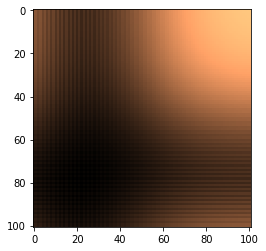

In [16]:
#print(len(ims))
#for c in ims:
#    print(c)


plt.imshow(ims[0], cmap = plt.cm.copper, animated=True)

plt.imshow(ims[1], cmap = plt.cm.copper, animated=True)
plt.imshow(ims[4], cmap = plt.cm.copper, animated=True)
    
#plt.imshow(ims[1], cmap = plt.cm.copper, animated=True)
#plt.imshow(ims[2], cmap = plt.cm.copper, animated=True)

ims = ims[:12]
print(len(ims))
for i in range(len(ims)):
    plt.imshow(ims[i], cmap = plt.cm.copper, animated=True, vmin = 0, vmax = 1)
    plt.savefig(str(i) + '.png')
    
    frames.append([plt.imshow(ims[i], cmap = plt.cm.copper, animated=True)])
os.system("ffmpeg -r 24 -i %01d.png -vcodec mpeg4 -y movie.mp4")


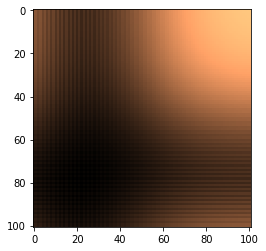

In [9]:
plt.imshow(ims[11], cmap = plt.cm.copper, animated=True)


In [10]:
frames

[[<matplotlib.image.AxesImage at 0x7efbd28afcf8>],

In [11]:


ani = animation.ArtistAnimation(fig, frames, interval=50, blit=True, repeat_delay=1000)
plt.show()

In [12]:
#fig, ax = plt.subplots(1, 1, figsize=(8, 8))
#show_patterns(c, ax=ax)
FFwriter=animation.FFMpegWriter(fps=24, extra_args=['-vcodec', 'libx264'])
ani.save("movie.mp4", writer=FFwriter)
plt.show()

In [13]:
math.copysign(0,1)

0.0

In [14]:
def show_patterns(U):
    #fig, ax = plt.subplots()
    X, Y = np.meshgrid(np.arange(-50, 51, 10), np.arange(-50, 51, 10))
    A, B = buildV(X,Y, .1)
    
    plt.quiver(X, Y, A, B, zorder = 0)
    #plt.imshow(U, cmap=plt.cm.copper,
     #         interpolation='bilinear',
      #        extent=[-1, 1, -1, 1], zorder = 1)
    
    #sns.heatmap(U)
    plt.axis('off')

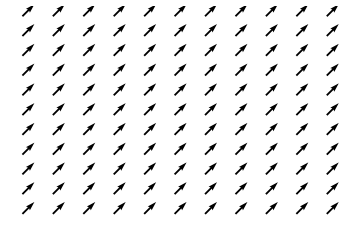

In [15]:
show_patterns(c)